#### TelCo Customer Churn : Capstone Project, Udacity DS Nanodegree 

## Table of Contents
* [Business Understanding](#int)
* [Data Understanding](#load)
* [Data Prep](#prep)
* [Modeling](#model)
* [Conclusions](#conclude)

## Business Understanding
<a class="anchor" id="int"></a>

In this project I will load and manipulate a TelCo customer dataset that is similar to AT&T/Verizon/Charter customer datasets with pandas and sklearn to engineer relevant features for predicting churn. The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California. It indicates which customers have left or stayed with their service provider. Where Churn is cancelling their service altogether. By identifying these customers before they churn, the business can offer discounts and incentives to stay thereby potentially saving the business revenue. We will be building a maching learning model that predicts the customer churn 

In [388]:
# import libraries
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn  as sns

from IPython.display import display 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


## Data Understanding
<a class="anchor" id="load"></a>
Our dataset file is `Telco-Customer-Churn.csv`. First the dataset must be loaded, cleaned, and Preped. For e.g., checking for invalid or missing data - for example, records without CustomerID or Contract

In [184]:
# read csv file and look at the data 
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head().T # df transposed to see all the columns

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [185]:
# look at how pandas infered the schema of the orginal dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> There are 7043 rows and 21 columns which is of a decent size and columns with no nulls 

> Churn is the target variable for our model. It takes two values: yes if the customer churned and no if the customer didn’t.

> Chrun column is an object type (categorical), which we will have to convert to numeric type

> The TotalCharges column in inferred as an object whereas it is really a float, we need to convert it to float

In [186]:
# convert the datatype of TotalCharges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [187]:
# checking the new datatype of the column
df["TotalCharges"].dtype

dtype('float64')

In [188]:
# checking the total number of NaN values in the new column
df["TotalCharges"].isnull().sum()

11

> we have 11 NaN values for the TotalCharges column

In [189]:
# since there are only 11 NaN records, we can safely fill them with Zeros
df["TotalCharges"]=df["TotalCharges"].fillna(0)

In [190]:
# check for any NaN records in the TotalCharges column
df["TotalCharges"].isna().sum()

0

> We do not have any NaN values in the column now.

The senior citizen column shows as integer datatype (1,0) , lets convert that into a object datatype

In [191]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype("object")

In [192]:
# make all the column names case normalized for consistency
df.columns = df.columns.str.lower()

In [193]:
# look at the new column names to ensure the names are all case normalized
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

> churn is the target variable but it is in object datatype, we need to convert into  numeric format

In [194]:
df["churn"].describe()

count     7043
unique       2
top         No
freq      5174
Name: churn, dtype: object

In [195]:
# the two unique values in churn columns are Yes and No
df["churn"].unique()

array(['No', 'Yes'], dtype=object)

In [196]:
# create a series that is boolean for "Yes" values in churn column
s = (df["churn"]=="Yes")

In [197]:
# now that we have a boolean series lets convert it to int datatype and assign it to churn column
df["churn"] = s.astype(int)

In [198]:
# test out the new values in the churn column 
df["churn"].head(5)

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

> the results align with the original churn values No,No,Yes,No,Yes for the first five rows in the original dataframe

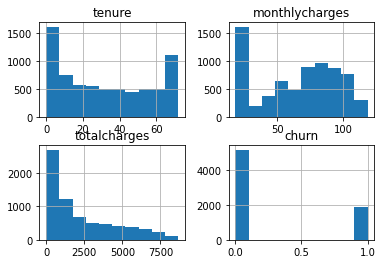

In [199]:
# let's look at the distribution of numerical columns of our dataframe
df.hist();

> the tenure column has mixed distribution with lots of customers below 1- 10 months range and around 500 to 1000 customers in the 60 -70 month range, monthly charge column has highest number of customers below $20 charge, the total charges column has high number of customers between $0 and $2500 charge, we have about 2000 customers who have churned and 5000 customers that haven't churned

Split the data in Train, Validation and Test splits

In [200]:
# Using Sklearn train_test_split function to split the whole dataset into train and test split at a test size of 20% 
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=8)

In [201]:
#checking the shape of df
df.shape

(7043, 21)

In [202]:
# checking the shape of train and test splits
df_train_full.shape,df_test.shape

((5634, 21), (1409, 21))

In [203]:
# checking to see if the test split is at 20% of the original dataframe
(df_test.shape[0]/df.shape[0])*100

20.005679397983815

> now that we have a train and a test split, lets split up the train set into train and validation sets

In [204]:
# Using Sklearn train_test_split function to split the train dataset into train and val splits at a val size of 33% 
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=42)

In [205]:
# checking to see if the val split is at 33% of the df_train_full dataframe
(df_val.shape[0]/df_train_full.shape[0])*100

33.01384451544196

> we have all the splits that we need , lets remove the churn values from the train and val splits and store them in different variables

In [206]:
# storing df_train churn values and df_val churn values in seperate variables
y_train = df_train["churn"].values
y_val = df_val["churn"].values

In [207]:
# checking values in y_train
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [208]:
# checking values in y_val
y_val

array([1, 0, 1, ..., 0, 0, 1])

In [209]:
# delete the churn values from the df_train and df_val dataframes
df_train= df_train.drop(columns="churn")
df_val= df_val.drop(columns="churn")

In [210]:
# checking columns in df_val
df_val.head(1).T

,3999
customerid,5276-KQWHG
gender,Female
seniorcitizen,1
partner,No
dependents,No
tenure,2
phoneservice,Yes
multiplelines,No
internetservice,Fiber optic
onlinesecurity,No


In [211]:
# checking columns in df_train
df_train.head(1).T

,1378
customerid,1697-BCSHV
gender,Female
seniorcitizen,0
partner,Yes
dependents,Yes
tenure,58
phoneservice,Yes
multiplelines,Yes
internetservice,DSL
onlinesecurity,No


> the churn column has been succesfully removed from both the dataframes

##### Exploratory data analysis
<a class="anchor" id="eda"></a>
Having a look at the data in a ML modelling perspective and understanding it beforehand is crucial to building a succesfull machine learning model, we should always look for missing values, distribution of values in target variable, number of unique categorical values etc.

> Look for any additional null handling needs in the dataset

In [212]:
# check for null values in the df_train_full
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

> We do not have any null values to handle

> Let us also look at the cardinality of the categorical features' values.

In [213]:
# print the unique values in each column of the categorical column
df_train_full.select_dtypes(include="object").nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

> All the categorical columns have low cardinality (except for customerid as expected) which is good news and it means we do not have to perform any additional handling of the values

> Check the distribution of target values

In [214]:
def plot_churn_dist(dataframe,type):
    """
    Plots the value counts of the churn column in the dataframe
    Param: dataframe name, and plot type
    Retuns plot with churn value counts
    """
    dataframe.churn.value_counts().plot(kind=type)

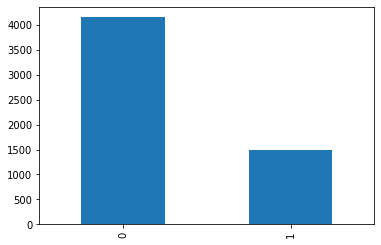

In [215]:
# call the above function to plot
plot_churn_dist(df_train_full,"bar")

> The dataset is an imbalanced dataset since the number of churned customers (~1500) is way less than the customers that still have service (~4000)

In [216]:
# check for the overall churn rate
churn_avg=df_train_full["churn"].mean()
churn_avg*100

26.393326233581828

> The churn rate is around 26%

> Lets calculate the Risk Ratio for all the categorical features to check for Churn risk across all groups in those features

In [217]:
# create a list of variables whose data type is object and assign it to categorical variable 
categorical_variables=list(df_train_full.select_dtypes(include="object").columns)[1:] # slice notation is used to exclude the customerid from the list

In [218]:
# lets display the risk rate for all the groups in the categorical_variables list
for col in categorical_variables:
    df_group = df_train_full.groupby(col)["churn"].agg(["mean"])
    df_group["rate"] = df_group["mean"]/churn_avg
    display(df_group)
    

,mean,rate
gender,,
Female,0.269370,1.020599
Male,0.258705,0.980190


,mean,rate
seniorcitizen,,
0,0.236240,0.895077
1,0.407692,1.544680


,mean,rate
partner,,
No,0.324306,1.228742
Yes,0.199117,0.754421


,mean,rate
dependents,,
No,0.308468,1.168734
Yes,0.157863,0.598118


,mean,rate
phoneservice,,
No,0.254682,0.964947
Yes,0.264902,1.003670


,mean,rate
multiplelines,,
No,0.248621,0.941984
No phone service,0.254682,0.964947
Yes,0.283494,1.074114


,mean,rate
internetservice,,
DSL,0.187891,0.711890
Fiber optic,0.416801,1.579190
No,0.073171,0.277232


,mean,rate
onlinesecurity,,
No,0.418422,1.585333
No internet service,0.073171,0.277232
Yes,0.140362,0.531808


,mean,rate
onlinebackup,,
No,0.392323,1.486449
No internet service,0.073171,0.277232
Yes,0.220840,0.836726


,mean,rate
deviceprotection,,
No,0.394737,1.495593
No internet service,0.073171,0.277232
Yes,0.218201,0.826726


,mean,rate
techsupport,,
No,0.416129,1.576645
No internet service,0.073171,0.277232
Yes,0.146221,0.554006


,mean,rate
streamingtv,,
No,0.337778,1.279785
No internet service,0.073171,0.277232
Yes,0.295729,1.120468


,mean,rate
streamingmovies,,
No,0.339606,1.286711
No internet service,0.073171,0.277232
Yes,0.294199,1.114672


,mean,rate
contract,,
Month-to-month,0.424077,1.606759
One year,0.111959,0.424195
Two year,0.025373,0.096135


,mean,rate
paperlessbilling,,
No,0.161872,0.613307
Yes,0.335855,1.272499


,mean,rate
paymentmethod,,
Bank transfer (automatic),0.171901,0.651304
Credit card (automatic),0.152866,0.579185
Electronic check,0.449761,1.704070
Mailed check,0.187257,0.709487


> from the above results we can infer that for example customers with month-to-month contract,electronic check payment,fiber optic service,senior citizens, no tech support, no online security and no device protection are at higher risk of churning (rate > 1.0)

Lets find out the most useful categorical features 

In [219]:
# write a function to calculate mutual info score using the mutual _info_score function from Scikit-learn
def calculate_mutual_info(series):                                      
    return mutual_info_score(series, df_train_full["churn"])     

# apply the newly created cal_mutual_info on each categorical feature of the data frame 
mutual_info = df_train_full[categorical_variables].apply(calculate_mutual_info) 
mutual_info.sort_values()

phoneservice        0.000023
gender              0.000073
multiplelines       0.000726
seniorcitizen       0.009539
partner             0.010184
dependents          0.013009
paperlessbilling    0.019694
streamingtv         0.032425
streamingmovies     0.032558
paymentmethod       0.043354
onlinebackup        0.044984
deviceprotection    0.045801
internetservice     0.055719
techsupport         0.064530
onlinesecurity      0.066617
contract            0.098797
dtype: float64

> out of all the categorical features , the contract is most useful where as phone service, gender are least useful features for our model

Lets now look at how the numerical features are corelated with churn

<AxesSubplot:>

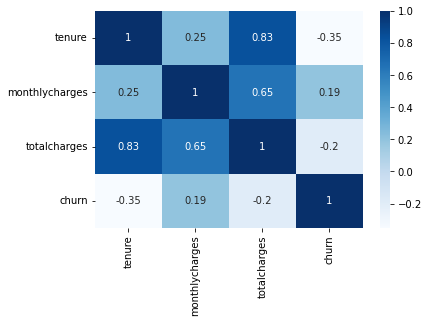

In [220]:
corr=df.corr()
sns.heatmap(corr,cmap="Blues",annot=True)

> monthly charges have a positive corelation with churn; as the monthly charges go up the churn rate goes up. While total charges and tenure has negative corelation; as they go up the churn rate goes down

## Data Prep
<a class="anchor" id="prep"></a>
After having a look at the data and finding out what can be useful for the model. Now we have a clear understanding on how other variables affect the target variable - churn. 

We now need to perform data prep steps; transforming all categorical variables to numeric features to prepare the data for ML model. 

In [221]:
# delete customerid column from the the train,val and test datasets as it has no bearing on our ML model
del df_train["customerid"]
del df_val["customerid"]
del df_test["customerid"]

In [222]:
# lets take a look at the 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 1378 to 6923
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            3774 non-null   object 
 1   seniorcitizen     3774 non-null   object 
 2   partner           3774 non-null   object 
 3   dependents        3774 non-null   object 
 4   tenure            3774 non-null   int64  
 5   phoneservice      3774 non-null   object 
 6   multiplelines     3774 non-null   object 
 7   internetservice   3774 non-null   object 
 8   onlinesecurity    3774 non-null   object 
 9   onlinebackup      3774 non-null   object 
 10  deviceprotection  3774 non-null   object 
 11  techsupport       3774 non-null   object 
 12  streamingtv       3774 non-null   object 
 13  streamingmovies   3774 non-null   object 
 14  contract          3774 non-null   object 
 15  paperlessbilling  3774 non-null   object 
 16  paymentmethod     3774 non-null   objec

In [223]:
# lets create a list of dictionaries off of this dataframe and vectorize its elements before feeding it to our model
train_dict = df_train.to_dict(orient="records")
train_dict[0]

{'gender': 'Female',
 'seniorcitizen': 0,
 'partner': 'Yes',
 'dependents': 'Yes',
 'tenure': 58,
 'phoneservice': 'Yes',
 'multiplelines': 'Yes',
 'internetservice': 'DSL',
 'onlinesecurity': 'No',
 'onlinebackup': 'Yes',
 'deviceprotection': 'No',
 'techsupport': 'No',
 'streamingtv': 'Yes',
 'streamingmovies': 'No',
 'contract': 'Month-to-month',
 'paperlessbilling': 'Yes',
 'paymentmethod': 'Bank transfer (automatic)',
 'monthlycharges': 66.8,
 'totalcharges': 3970.4}

In [224]:
# instantiate DictVectorizer and vectorize the train_dict using this object
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [225]:
# convert the dictionaries to matrix using the transform method
X_train = dv.transform(train_dict)

In [226]:
# lets look at the shape of X_train
X_train.shape

(3774, 45)

> we now have a matrix of 45 coulmns 

In [227]:
# lets look at first row
X_train[0]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 6.6800e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 5.8000e+01, 3.9704e+03])

> all the values are now 0's and 1's except for the 3 categorical variables

In [228]:
# lets take a look at the columns names
dv.get_feature_names_out()

array(['contract=Month-to-month', 'contract=One year',
       'contract=Two year', 'dependents=No', 'dependents=Yes',
       'deviceprotection=No', 'deviceprotection=No internet service',
       'deviceprotection=Yes', 'gender=Female', 'gender=Male',
       'internetservice=DSL', 'internetservice=Fiber optic',
       'internetservice=No', 'monthlycharges', 'multiplelines=No',
       'multiplelines=No phone service', 'multiplelines=Yes',
       'onlinebackup=No', 'onlinebackup=No internet service',
       'onlinebackup=Yes', 'onlinesecurity=No',
       'onlinesecurity=No internet service', 'onlinesecurity=Yes',
       'paperlessbilling=No', 'paperlessbilling=Yes', 'partner=No',
       'partner=Yes', 'paymentmethod=Bank transfer (automatic)',
       'paymentmethod=Credit card (automatic)',
       'paymentmethod=Electronic check', 'paymentmethod=Mailed check',
       'phoneservice=No', 'phoneservice=Yes', 'seniorcitizen',
       'streamingmovies=No', 'streamingmovies=No internet service',

> tenure , totalcharges and monthlycharges column names haven't changed because they are numerical variables 

In [237]:
# lets now repeat the same process for df_val
val_dict = df_val.to_dict(orient="records")
val_dict[0]

{'gender': 'Female',
 'seniorcitizen': 1,
 'partner': 'No',
 'dependents': 'No',
 'tenure': 2,
 'phoneservice': 'Yes',
 'multiplelines': 'No',
 'internetservice': 'Fiber optic',
 'onlinesecurity': 'No',
 'onlinebackup': 'No',
 'deviceprotection': 'No',
 'techsupport': 'No',
 'streamingtv': 'No',
 'streamingmovies': 'No',
 'contract': 'Month-to-month',
 'paperlessbilling': 'Yes',
 'paymentmethod': 'Electronic check',
 'monthlycharges': 69.6,
 'totalcharges': 131.65}

In [402]:
# vectorize val_dict using the tranform method and store in X_val
X_val = dv.transform(val_dict)

## Modeling
<a class="anchor" id="model"></a>
After prepping the data by using Scikit-learn to perform one-hot encoding for categotrical variables we are now ready to build a ML model with the data

We will use classification algorithms since our problem is a binary classification in that we are predicting if a customer is likley to churn or not. 

We can test different ML algorithms including 

* Logisitic regression - avoids overfitting, good explainability and efficient to train
* Random Forest Classifier - ensemble method, avoids overfitting and deals well with imbalanced datasets like ours
* Naive Bayes - easy and fast implementation 

In [301]:
# instantiate models
lr = LogisticRegression(solver="liblinear",random_state=1)# choosing liblinear initially as the dataset is small
rf = RandomForestClassifier(n_estimators=20,random_state=1)
nb = GaussianNB() 
# keep model objects here 
models =[lr,rf,nb]
# loop thru all the elements in the models list
for i in models:
    print("Model:", i)
    start = time.time()
    #fit using the train data
    i.fit(X_train, y_train)
    end = time.time()
    print("Time taken to train (seconds): ", end - start)
    predictions = i.predict(X_val)
    print("Accuracy: ",metrics.accuracy_score(y_val, predictions))
    print("F1: ",metrics.f1_score(y_val, predictions))
    print("\n")


Model: LogisticRegression(random_state=1, solver='liblinear')
Time taken to train (seconds):  0.018948793411254883
Accuracy:  0.8166666666666667
F1:  0.6391534391534391


Model: RandomForestClassifier(n_estimators=20, random_state=1)
Time taken to train (seconds):  0.08773517608642578
Accuracy:  0.782258064516129
F1:  0.5434047350620068


Model: GaussianNB()
Time taken to train (seconds):  0.0029916763305664062
Accuracy:  0.6967741935483871
F1:  0.6142270861833105




> Out of the above estimators the Logistic Regression classifier delivered best results in terms of time taken to complete, Accuracy and F1 scores. So lets go with that estimator

Model Tuning

In [287]:
# lets see what paramters we can tune
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

> we can use penalty, C , solver and max_iter params

In [329]:
# create a parameter grid and use it to store various parameter values for logistic regression
param_grid = [    
    {'penalty' : ['l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [1000,2500, 5000]
    }
]

In [374]:
# create an instance of GridSearchCV to perform an exhaustive search over the specified paramater values for logistic regression. Using 5 fold CV. 
clf = GridSearchCV(lr, param_grid = param_grid, cv = 5, n_jobs=-1, verbose=True,scoring="accuracy")

In [375]:
# fit train data 
best_classifier = clf.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [376]:
# print the best score  and the best paramaters 
print("Best: %f using %s" % (best_classifier.best_score_, best_classifier.best_params_))

Best: 0.809482 using {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


> our best model achieved an accuracy of 0.80. Accuracy means the number of accurate predictions out of all the predictions. From the above results , we are able to accurately predict the 80 correct churns out of 100 total churn predictions using linear regression estimator with max iteration of 1000 , C of 0.1, l2 penalty and a lbfgs solver.  

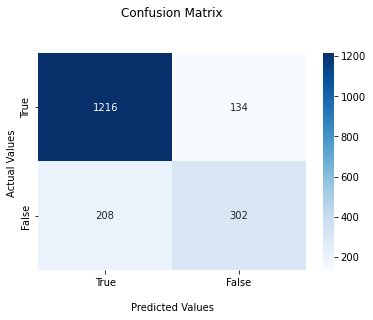

In [401]:
# lets see the confusion matrix using the best classifier's best estimator 
y_pred = best_classifier.best_estimator_.predict(X_val)

# heat map using sns and scikitlearn's confusion_matrix function
ax = sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show();

> there are 1216 true positives (predicted positive and it’s true) , 302 true negatives (predicted negative and it’s true), 134 false positives (predicted positive and it’s false) and 208 false negatives (You predicted negative and it’s false)

Best Estimator Feature Importance

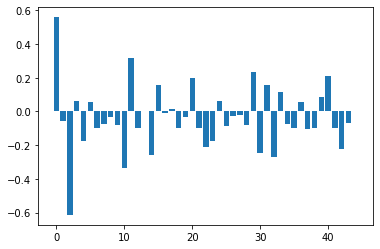

In [350]:
# get importance
feat_importance = best_classifier.best_estimator_.coef_[0]

# plot feature importance
plt.bar([x for x in range(len(feat_importance))], feat_importance)
plt.show();

>  Notice that the coefficients are both positive and negative. We have a total of 45 features and the positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0. No clear pattern of important and unimportant features can be identified from the above visualization

## Conclusion
<a class="anchor" id="conclude"></a>

We used the telco customer churn data set from kaggle and after loading and cleaning the data , we explore the dataset to see the risk ratio , mutual info , corelation of various feature to the target variable. we also prepared the data along the way by converting datatypes to more suitable types. We then looked at various estimators to solve the binary classification problem, Logistic regression estimator gave the best accuracy among all the three estimators. We tuned the model and achieved an accuracy of 80%. We could increase the accuracy by testing the data with other estimators and use only features that are more important than others. 

References

https://www.delftstack.com/howto/python/python-get-class-name/ </br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ </br>
https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning </br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html </br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ </br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/ </br>
https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=Plot%20Confusion%20Matrix%20for%20Binary%20Classes%20With%20Labels&text=You%20need%20to%20create%20a,matrix%20with%20the%20labels%20annotation </br>
https://stats.stackexchange.com/questions/130420/logistic-regression-how-good-is-my-model </br>